In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import OneHotEncoder
from google.colab import files

In [ ]:
file = files.upload()

Saving pubg-weapon-stats.csv to pubg-weapon-stats.csv


In [ ]:
raw_data = pd.read_csv("pubg-weapon-stats.csv")

In [ ]:
data = raw_data.copy()
print('Number of Rows  :', data.shape[0])
print('Number of Columns  :', data.shape[1])
data.head()

Number of Rows  : 44
Number of Columns  : 20


,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

In [ ]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
data[row_has_NaN]

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
31,Sawed-Off,Pistol,12.00,160,2,25.0,NaN,0.25,2,1,640.0,Automatic,159.2,111.2,95.2,71.2,238.4,167.2,143.2,107.2
33,R45,Pistol,0.45,55,6,25.0,NaN,0.25,4,2,220.0,Automatic,54.8,38.3,32.8,24.6,109.6,76.7,65.7,49.3
37,Skorpion,Pistol,9.00,22,20,60.0,400.0,0.07,8,4,312.0,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Crossbow,Other,NaN,106,1,NaN,NaN,3.80,2,1,28.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Pan,Melee,NaN,80,1,NaN,NaN,0.75,3,1,107.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Crowbar,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Sickle,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Machete,Melee,NaN,60,1,NaN,NaN,0.75,3,2,80.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Punch,Melee,NaN,18,1,NaN,NaN,0.33,10,4,55.0,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_primary = data[(data['Weapon Type']!='Melee') & (data['Weapon Type']!='Other') & (data['Weapon Type']!='Pistol')]

In [ ]:
print(data_primary.info())
data_primary.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            31 non-null     object 
 1   Weapon Type            31 non-null     object 
 2   Bullet Type            31 non-null     float64
 3   Damage                 31 non-null     int64  
 4   Magazine Capacity      31 non-null     int64  
 5   Range                  31 non-null     float64
 6   Bullet Speed           31 non-null     float64
 7   Rate of Fire           31 non-null     float64
 8   Shots to Kill (Chest)  31 non-null     int64  
 9   Shots to Kill (Head)   31 non-null     int64  
 10  Damage Per Second      31 non-null     float64
 11  Fire Mode              31 non-null     object 
 12  BDMG_0                 31 non-null     float64
 13  BDMG_1                 31 non-null     float64
 14  BDMG_2                 31 non-null     float64
 15  BDMG_3  

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


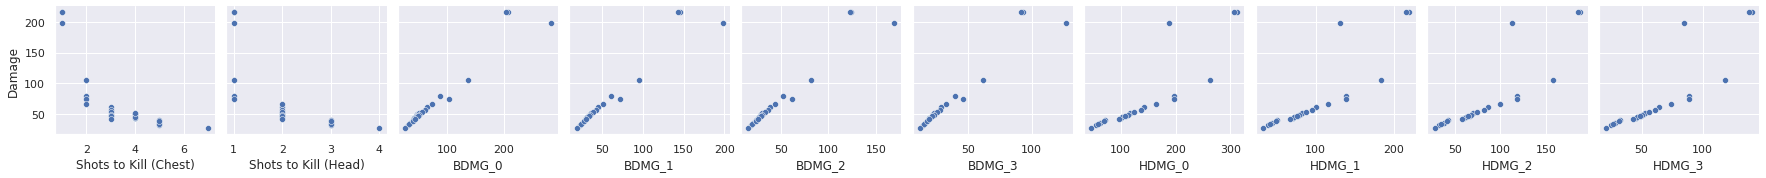

In [ ]:
sns.pairplot(
        data = data_primary,
        y_vars = ['Damage'],
        x_vars = ['Shots to Kill (Chest)', 'Shots to Kill (Head)',
              'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1',
              'HDMG_2', 'HDMG_3'])

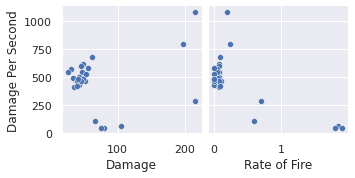

In [ ]:
sns.pairplot(
        data = data_primary,
        y_vars = ['Damage Per Second'],
        x_vars = ['Damage','Rate of Fire'])

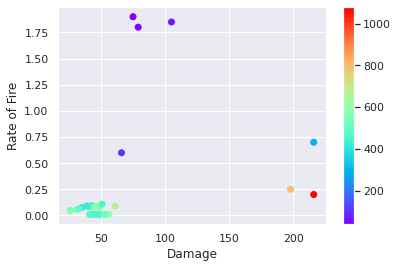

In [ ]:
plt.scatter(data_primary['Damage'],data_primary['Rate of Fire'], c=data_primary['Damage Per Second'], cmap='rainbow')
plt.xlabel('Damage')
plt.ylabel('Rate of Fire')
plt.colorbar()
plt.show()

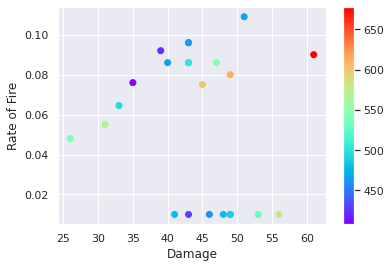

In [ ]:
demo_data = data_primary[(data_primary['Damage'] <100) & (data_primary['Rate of Fire'] < 0.50)]
plt.scatter(demo_data['Damage'],demo_data['Rate of Fire'], c=demo_data['Damage Per Second'], cmap='rainbow')
plt.xlabel('Damage')
plt.ylabel('Rate of Fire')
plt.colorbar()
plt.show()

In [ ]:
data_temp = data_primary.copy()

In [ ]:
data_temp.rename(columns = {
    'Rate of Fire' : 'ROF',
    'Damage Per Second' : 'DPS',
    'Bullet Type' : 'BulletType',
    'Bullet Speed': 'BulletSpeed',
    'Fire Mode' : 'FireMode'
}, inplace=True)

In [ ]:
data_temp['ROF'] = np.round((1/data_temp.ROF),2)

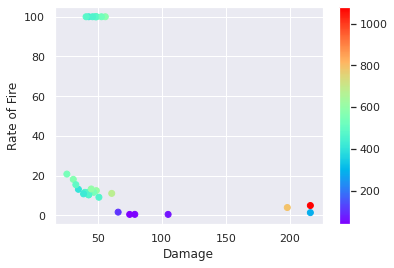

In [ ]:
plt.scatter(data_temp['Damage'],data_temp['ROF'], c=data_temp['DPS'], cmap='rainbow')
plt.xlabel('Damage')
plt.ylabel('Rate of Fire')
plt.colorbar()
plt.show()

In [ ]:
data_temp[data_temp['ROF']>80]

,Weapon Name,Weapon Type,BulletType,Damage,Magazine Capacity,Range,BulletSpeed,ROF,Shots to Kill (Chest),Shots to Kill (Head),DPS,FireMode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,100.0,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,100.0,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,100.0,4,2,430.0,"Single, Burst",43.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
22,SLR,Designed Marksman Rifle,7.62,56,10,800.0,835.0,100.0,3,2,580.0,Automatic,60.9,42.6,36.5,27.4,136.3,95.4,81.7,61.3
23,SKS,Designed Marksman Rifle,7.62,53,10,800.0,800.0,100.0,3,2,530.0,Automatic,55.6,38.9,33.3,25.0,124.5,87.1,74.7,56.0
24,QBU,Designed Marksman Rifle,5.56,48,10,800.0,800.0,100.0,3,2,480.0,Automatic,50.4,35.2,30.2,22.6,112.8,78.9,67.6,50.7
25,Mini14,Designed Marksman Rifle,5.56,46,20,700.0,990.0,100.0,3,2,460.0,Automatic,48.3,33.8,28.9,21.7,108.1,75.6,64.8,48.6
26,VSS,Designed Marksman Rifle,9.00,41,10,500.0,300.0,100.0,3,2,479.0,Automatic,43.0,30.1,25.8,19.3,96.3,67.4,57.8,43.3


In [ ]:
data_temp[data_temp['Damage']>=150]

,Weapon Name,Weapon Type,BulletType,Damage,Magazine Capacity,Range,BulletSpeed,ROF,Shots to Kill (Chest),Shots to Kill (Head),DPS,FireMode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
18,S686,Shotgun,12.0,216,2,25.0,370.0,5.00,1,1,1080.0,Automatic,207.9,145.8,124.2,93.6,312.3,218.7,187.2,140.4
19,S1897,Shotgun,12.0,216,5,25.0,360.0,1.43,1,1,288.0,Automatic,204.3,143.1,122.4,91.8,306.9,215.1,184.5,137.7
20,S12K,Shotgun,12.0,198,5,25.0,350.0,4.00,1,1,792.0,Automatic,282.6,198.0,169.2,126.9,188.1,131.4,112.5,84.6


In [ ]:
data_temp.loc[data_temp['Weapon Name'] == 'S686', 'Damage'] = 26
data_temp.loc[data_temp['Weapon Name'] == 'S1897', 'Damage'] = 26
data_temp.loc[data_temp['Weapon Name'] == 'S12K', 'Damage'] = 24

data_temp.loc[data_temp['Weapon Name'] == 'AKM', 'ROF'] = 10
data_temp.loc[data_temp['Weapon Name'] == 'MK47 Mutant', 'ROF'] = 10
data_temp.loc[data_temp['Weapon Name'] == 'M16A4', 'ROF'] = 13.34
data_temp.loc[data_temp['Weapon Name'] == 'SLR', 'ROF'] = 10
data_temp.loc[data_temp['Weapon Name'] == 'SKS', 'ROF'] = 11.11
data_temp.loc[data_temp['Weapon Name'] == 'QBU', 'ROF'] = 10
data_temp.loc[data_temp['Weapon Name'] == 'Mini14', 'ROF'] = 10
data_temp.loc[data_temp['Weapon Name'] == 'VSS', 'ROF'] = 11.63

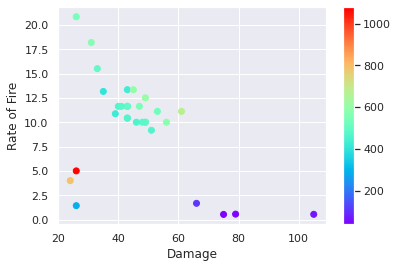

In [ ]:
plt.scatter(data_temp['Damage'],data_temp['ROF'], c=data_temp['DPS'], cmap='rainbow')
plt.xlabel('Damage')
plt.ylabel('Rate of Fire')
plt.colorbar()
plt.show()

In [ ]:
data_temp['newDPS'] = np.round((data_temp.ROF*data_temp.Damage),2)
data_temp['difDPS'] = np.round((data_temp.newDPS - data_temp.DPS),2)
data_temp[['Weapon Name','Damage','ROF','DPS','newDPS','difDPS']]

,Weapon Name,Damage,ROF,DPS,newDPS,difDPS
0,Groza,49,12.50,612.0,612.50,0.50
1,AKM,49,10.00,490.0,490.00,0.00
2,M762,47,11.63,547.0,546.61,-0.39
3,MK47 Mutant,49,10.00,490.0,490.00,0.00
4,AUG A3,43,11.63,502.0,500.09,-1.91
5,SCAR-L,43,10.42,448.0,448.06,0.06
6,M416,43,11.63,502.0,500.09,-1.91
7,M16A4,43,13.34,430.0,573.62,143.62
8,G36C,43,11.63,502.0,500.09,-1.91
9,OBZ,43,10.42,466.0,448.06,-17.94


In [ ]:
data_temp = data_temp.drop(['DPS','difDPS'], axis=1)
data_temp = data_temp.drop(['Shots to Kill (Chest)', 'Shots to Kill (Head)','BDMG_0',
       'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1', 'HDMG_2', 'HDMG_3'], axis=1)

In [ ]:
data_temp.head()

,Weapon Name,Weapon Type,BulletType,Damage,Magazine Capacity,Range,BulletSpeed,ROF,FireMode,newDPS
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,12.50,"Single, Automatic, Burst",612.50
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,10.00,"Single, Automatic",490.00
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,11.63,"Single, Automatic, Burst",546.61
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,10.00,"Single, Burst",490.00
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,11.63,"Single, Automatic",500.09


In [ ]:
data_temp['FireMode'].unique()

array(['Single, Automatic, Burst', 'Single, Automatic', 'Single, Burst',
       'Automatic', 'Single'], dtype=object)

In [ ]:
data_temp['FireMode'] = data_temp['FireMode'].map({
    'Single, Automatic, Burst' : 'Automatic',
    'Single, Automatic' : 'Automatic',
    'Single, Burst' : 'Burst',
    'Automatic' : 'Automatic',
    'Single' : 'Single'
})

In [ ]:
data_temp['FireMode'].unique()

array(['Automatic', 'Burst', 'Single'], dtype=object)

In [ ]:
onhotEncoder = OneHotEncoder()
onhot_df = pd.DataFrame(onhotEncoder.fit_transform(data_temp[['FireMode']]).toarray())
onhot_df.columns = onhotEncoder.get_feature_names()
onhot_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Automatic,x0_Burst,x0_Single
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [ ]:
data_final = data_temp.copy()

In [ ]:
data_final = data_final.join(onhot_df)

In [ ]:
data_final = data_final.drop(['FireMode'], axis=1)

In [ ]:
data_final

,Weapon Name,Weapon Type,BulletType,Damage,Magazine Capacity,Range,BulletSpeed,ROF,newDPS,x0_Automatic,x0_Burst,x0_Single
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,12.50,612.50,1.0,0.0,0.0
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,10.00,490.00,1.0,0.0,0.0
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,11.63,546.61,1.0,0.0,0.0
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,10.00,490.00,0.0,1.0,0.0
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,11.63,500.09,1.0,0.0,0.0
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,10.42,448.06,1.0,0.0,0.0
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,11.63,500.09,1.0,0.0,0.0
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,13.34,573.62,0.0,1.0,0.0
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,11.63,500.09,1.0,0.0,0.0
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,10.42,448.06,1.0,0.0,0.0
